## Fall 2020 CS 4641\7641 A: Machine Learning Homework 4

## Instructor: Dr. Mahdi Roozbahani

## Deadline: November 18th, Wednesday, AOE

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.

## Instructions for the assignment

- In this assignment, we have programming and writing questions.
- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
- You could directly type the Latex equations in the markdown cell.
- Typing with Latex\markdown is required for all the written questions. Handwritten answers would not be accepted. 
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.
- Questions marked with <span style="color:blue">**[P]**</span> are programming only and should be submitted to the autograder. Questions marked with <span style="color:green">**[W]**</span> may required that you code a small function or generate plots, but should **NOT** be submitted to the autograder. It should be submitted on the writing portion of the assignment on gradescope
- The outline of the assignment is as follows:
    * Q1 [55+(10 bonus for undergrads)] > Neural Network <span style="color:green">**[W]** </span>| <span style="color:blue">**[P]**</span>
    * Q2 [15 pts(bonus for all)] > Image Classification based on Convolutional Neural Network </span>| <span style="color:green">**[W]**</span>
    * Q3 [40 pts] > Random Forest <span style="color:blue">**[P]** 3.1, 3.2 </span> | <span style="color:green">**[W]**</span> 3.3
    * Q4 [30 pts] > SVM <span style="color:green">**[W]** </span>
    

## Using the autograder

- You will find two assignments on Gradescope that correspond to HW4: "HW4 - Programming" and "HW4 - Non-programming" (and "HW4 - Bonus Programming" if you are in CS4641).
- You will submit your code for the autograder on "HW4 - Programming" in the following format:
    
    * random_forest.py
    * neural_network.py
- You will submit your code for the autograder on "HW4 - Bonus-Programming" in the following format:
    
    * neural_network.py

- All you will have to do is to copy your implementations of the classes "dlnet" and "RandomForest" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW4 - Non-programming" part, you will download your jupyter notbook as HTML, print it as a PDF from your browser and submit it on Gradescope. To download the notebook as html, click on "File" on the top left corner of this page and select "Download as > HTML". The non-programming part corresponds to Q1, Q2, Q3.3, Q4**

## Environment Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn import svm

## 1. Two Layer Neural Network [65pts] <span style="color:blue">**[P]**</span>

### Perceptron

![Perceptron](https://drive.google.com/uc?id=1k_ITywpGxTqXd12fYZGstjj6A5H_Lk-w)
<br><br>

A single layer perceptron can be thought of as a linear hyperplane as in logistic regression followed by a non-linear activation function. $$u_{i} = \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i}$$  $$o_{i} = \phi \left( \sum \limits_{j=1}^{d} \theta_{ij}x_{j}+b_{i} \right) = \phi(\theta_{i}^{T}x+b_{i})$$ where $x$ is a d-dimensional vector i.e. $x \in R^{d}$. It is one datapoint with $d$ features. $\theta_{i} \in R^{d}$ is the weight vector for the $i^{th}$ hidden unit, $b_{i} \in R$ is the bias element for the $i^{th}$ hidden unit and $\phi(.)$ is a non-linear activation function that has been described below. $u_{i}$ is a linear combination of the features in $x$ weighted by $\theta_{i}$ whereas $o_{i}$ is the $i^{th}$ output unit from the activation layer. 


## Fully connected Layer
Typically, a modern neural network contains millions of perceptrons as the one shown in the previous image. Perceptrons interact in different configurations such as cascaded or parallel. In this part, we describe a fully connected layer configuration in a neural network which comprises multiple parallel perceptrons forming one layer. 

We extend the previous notation to describe a fully connected layer. Each layer in a fully connected network has a number of input/hidden/output units cascaded in parallel. Let us a define a single layer of the neural net as follows: <br>
$m$ demotes the number of hidden units in a single layer $l$ whereas $n$ denotes the number of units in the previous layer $l-1$.
$$u^{[l]}=\theta^{[l]}o^{[l-1]}+b^{[l]}$$ where $u^{[l]} \in R^{m}$ is a m-dimensional vector pertaining to the hidden units of the $l^{th}$ layer of the neural network after applying linear operations. Similarly, $o^{[l-1]}$ is the n-dimensional output vector corresponding to the hidden units of the $(l-1)^{th}$ activation layer. $\theta^{[l]} \in R^{m \times n}$ is the weight matrix of the $l^{th}$ layer where each row of $\theta^{[l]}$ is analogous to $\theta_{i}$ described in the previous section i.e. each row corresponds to one hidden unit of the $l^{th}$ layer. $b^{[l]} \in R^{m}$ is the bias vector of the layer where each element of b pertains to one hidden unit of the $l^{th}$ layer. This is followed by element wise non-linear activation function $o^{[l]} = \phi(u^{[l]})$.
The whole operation can be summarized as,
$$o^{[l]} = \phi(\theta^{[l]}o^{[l-1]}+b^{[l]}) $$
where $o^{[l-1]}$ is the output of the previous layer. 





## Activation Function 
There are many activation functions in the literature but for this question we are going to use Relu, Sigmoid and Tanh only. 
### Relu
The rectified linear unit (Relu) is one of the most commonly used activation functions in deep learning models. The mathematical form is $$o = \phi(u) = max(0,u)$$<br> The derivative of relu function is given as $o' = \phi'(u) = \begin{cases}
&0& u \leq 0 \\
&1& u > 0
\end{cases} $  


![Relu](https://drive.google.com/uc?id=1qFNOnhB3B0wgt56bMsc-WI6cX0UWJAQX)




### Sigmoid
The sigmoid function is another non-linear function with S-shaped curve. This function is useful in the case of binary classification as its output is between 0 and 1. The mathematical form of the function is $$o = \phi(u)=\frac{1}{1+e^{-u}}$$<br> The derivation of the sigmoid function has a nice form and is given as $$o' = \phi'(u) = \frac{1}{1+e^{-u}} \left(1-\frac{1}{1+e^{-u}}\right) = \phi(u)(1-\phi(u))$$
<br><br>

![Sigmoid](https://drive.google.com/uc?id=19UPS1IfcVNqH_PMAPg6ymAAVqGo9zHle)

### Tanh
Tanh also known as hyperbolic tangent is like a shifted version of sigmoid activation function with its range going from -1 to 1. Tanh almost always proves to be better than the sigmoid function since the mean of the activations are closer to zero. Tanh has an effect of centering data that makes learning for the next layer a bit easier. The mathematical form of tanh is given as $$o = \phi(u) = tanh(u) = \frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}$$ The derivative of tanh is given as $$o' = \phi'(u) = 1 - {\left(\frac{e^{u} - e^{-u}}{e^{u} + e^{-u}}\right)}^{2} = 1 - o^{2}$$

![Tanh](https://drive.google.com/uc?id=1FD83cZIsI1gY6g0dDKyaaHFrCnThl9za)


## Cross Entropy Loss
An essential piece in training a neural network is the loss function. The whole purpose of gradient descent algorithm is to find some network parameters that minimizes the loss function. In this exercise, we minimize Cross Entropy (CE) loss that represents on an intuitive level the distance between true data distribution and estimated distribution by neural network. So during training of the neural network, we will be looking for network parameters that minimizes the distance between true and estimated distribution. The mathematical form of the CE loss is given by 
$$CE(p,q) = -\sum\limits_{i} p(x_{i})\log q(x_{i}) $$
where $p(x)$ is the true distribution and $q(x)$ is the estimated distribution. 
### Implementation details
For binary classification problems as in this exercise, we have probability distribution of a label $y_{i}$ given by
\begin{equation}
y_{i}= 
\begin{cases}
&1& \text{ with probability } p(x_{i}) \\
&0& \text{ with probability } 1- p(x_{i})
\end{cases}
\end{equation}
A frequentist estimate of $p(x_{i})$ can be written as $$p(x_{i})= \sum\limits_{i=1}^{N} \frac{y_{i}}{N}$$ Therefore, the cross entropy for binary estimation can be written as 
$$CE(y_{i},\hat{y_{i}}) = -\frac{1}{N}\sum\limits_{i=1}^{N}\left(y_{i} \log (\hat{y_{i}}) +(1-y_{i}) \log (1-\hat{y_{i}})\right)$$
where $y_{i} \in \{ 0,1\}$ is the true label and $\hat{y_{i}} \in [0,1]$ is the estimated label.  

## Forward Propagation
We start by initializing the weights of the fully connected layer using Xavier initialization [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf). During training, we pass all the data points through the network layer by layer using forward propagation. The main equations for forward prop have been described below. 
\begin{eqnarray}
u^{[0]} &=& x\\
u^{[1]}&=& \theta^{[1]}u^{[0]}+b^{[1]} \\
o^{[1]}&=& Relu(u^{[1]}) \\
u^{[2]}&=& \theta^{[2]}o^{[1]}+b^{[2]} \\
\hat{y}=o^{[2]}&=& Sigmoid(u^{[2]}) \\
\end{eqnarray}


Then we get the output and compute the loss 
$$l = -\frac{1}{N}\sum\limits_{i=1}^{N}\left(y_{i} \log (\hat{y_{i}}) +(1-y_{i}) \log (1-\hat{y_{i}})\right)$$


## Backward propagation
After the forward pass, we do back propagation to update the weights and biases in the direction of the negative gradient of the loss function. So, we update the weights and biases using the following formulas
\begin{equation}
\theta^{[2]} := \theta^{[2]} - lr \times \frac{\partial l}{\partial \theta^{[2]}} \\
b^{[2]} := b^{[2]} - lr \times \frac{\partial l}{\partial b^{[2]}} \\
\theta^{[1]} := \theta^{[1]} - lr \times \frac{\partial l}{\partial \theta^{[1]}} \\
b^{[1]} := b^{[1]} - lr \times \frac{\partial l}{\partial b^{[1]}}
\end{equation}
where $lr$ is the learning rate. It decides the step size we want to take in the direction of the negative gradient. 



To compute the terms $\frac{\partial l}{\partial \theta^{[i]}}$ and $ \frac{\partial l}{\partial b^{[i]}}$ we use chain rule for differentiation as follows:

\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial \theta^{[2]}} \\
\frac{\partial l}{\partial b^{[2]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial b^{[2]}}
\end{eqnarray}

So, $\frac{\partial l}{\partial o^{[2]}}$ is the differentiation of the cross entropy loss function at point $o^{[2]}$ <br><br> $\frac{\partial o^{[2]}}{\partial u^{[2]}}$ is the differentiation of the Sigmoid function at point $u^{[2]}$ <br><br> $\frac{\partial u^{[2]}}{\partial \theta^{[2]}}$ is equal to $o^{[1]}$ <br><br> $\frac{\partial u^{[2]}}{\partial b^{[2]}}$ is equal to $1$. <br><br>

To compute $\frac{\partial l}{\partial \theta^{[2]}}$, we need $o^{[2]}, u^{[2]} \& o^{[1]}$ which are calculated during forward propagation. So we need to store these values in cache variables during forward propagation to be able to access them during backward propagation. Similarly for calculating other partial derivatives, we store the values we'll be needing for chain rule in cache. These values are obtained from the forward propagation and used in backward propagation. The cache is implemented as a dictionary here where the keys are the variable names and the values are the variables values.  <br><br>Also, the functional form of the CE differentiation and Sigmoid differentiation are given by <br><br>
\begin{eqnarray}
\frac{\partial l}{\partial o^{[2]}} &=& \frac{-1}{N}\left(\frac{y}{o^{[2]}}-\frac{1-y}{1-o^{[2]}}\right) \\
\frac{\partial o^{[2]}}{\partial u^{[2]}} &=& \frac{1}{1+e^{-u^{[2]}}} \left(1- \frac{1}{1+e^{-u^{[2]}}} \right) &=& o^{[2]}(1-o^{[2]})  \\
\frac{\partial u^{[2]}}{\partial \theta^{[2]}} &=& o^{[1]} \\
\frac{\partial u^{[2]}}{\partial b^{[2]}} &=& 1
\end{eqnarray}

This completes the differentiation of loss function w.r.t to parameters in the second layer. We now move on to the first layer, the equations for which are given as follows: <br><br> 
\begin{eqnarray}
\frac{\partial l}{\partial \theta^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial \theta^{[1]}}  \\
\frac{\partial l}{\partial b^{[1]}}&=&\frac{\partial l}{\partial o^{[2]}}\frac{\partial o^{[2]}}{\partial u^{[2]}}\frac{\partial u^{[2]}}{\partial o^{[1]}} \frac{\partial o^{[1]}}{\partial u^{[1]}} \frac{\partial u^{[1]}}{\partial b^{[1]}}
\end{eqnarray}

Where 
\begin{eqnarray}
\frac{\partial u^{[2]}}{\partial o^{[1]}} &=& \theta^{[2]} \\
\frac{\partial o^{[1]}}{\partial u^{[1]}} &=&  
\begin{cases}
&0& \text{ if } u^{[1]} \leq 0 \\
&1& \text{ if } u^{[1]} > 0 
\end{cases}\\
\frac{\partial u^{[1]}}{\partial \theta^{[1]}} &=& x\\
\frac{\partial u^{[1]}}{\partial b^{[1]}} &=& 1
\end{eqnarray}

Note that $\frac{\partial o^{[1]}}{\partial u^{[1]}}$ is the differentiation of the Relu function at $u^{[1]}$.

The above equations outline the forward and backward propagation process for a 2-layer fully connected neural net with relu as the first activation layer and sigmoid has the second one. The same process can be extended to different neural networks with different activation layers like tanh. 



## Code Implementation: 

$$ \begin{eqnarray} dLoss\_o2 &=& \frac{\partial l}{\partial o^{[2]}} \implies dim=(1,426) \\ dLoss\_u2 &=& dLoss\_o2 \frac{\partial o^{[2]}}{\partial u^{[2]}} \implies dim=(1,426) \\ dLoss\_theta2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial \theta^{[2]}} \implies dim=(1,15) \\ dLoss\_b2 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial b^{[2]}} \implies dim=(1,1) \\ dLoss\_o1 &=& dLoss\_u2 \frac{\partial u^{[2]}}{\partial o^{[1]}} \implies dim=(15,426) \\ dLoss\_u1 &=& dLoss\_o1 \frac{\partial o^{[1]}}{\partial u^{[1]}} \implies dim=(15,426) \\ dLoss\_theta1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial \theta^{[1]}} \implies dim=(15,30) \\ dLoss\_b1 &=& dLoss\_u1 \frac{\partial u^{[1]}}{\partial b^{[1]}} \implies dim=(15,1) \end{eqnarray} $$ 


















### Question 

In this question, you will implement a two layer fully connected neural network. You will also experiment with different activation functions and optimization techniques. Functions with comments "TODO: implement this" are for you to implement. We provide three activation functions here - Relu, Tanh and Sigmoid. You will implement a neural network that could have relu activation followed by sigmoid layer or tanh activation followed by sigmoid. You'll have to specify the neural net type which could be "Relu -> Sigmoid" (set by default) or "Tanh -> Sigmoid". 


You'll also implement gradient descent and stochastic gradient descent algorithms for training these neural nets. SGD is bonus for undergraduate students. 

We'll train these neural nets on breast cancer dataset. You're free to choose either gradient descent or SGD for training. Note: it is possible you'll run into nan or negative values for loss. This happens because of the small dataset we're using and some numerical stability issues that arise due to division by zero, natural log of zeros etc. You can experiment with the total number of iterations to mitigate this. 

<b>Deliverables for this question: </b>
1. Loss plot and classification report for any neural net type ("Relu -> Sigmoid" or "Tanh -> Sigmoid") with gradient descent 
2. Loss plot and classification report for any neural net type ("Relu -> Sigmoid" or "Tanh -> Sigmoid") with stochastic gradient descent (mandatory for graduate students, bonus for undergraduate students)

In [5]:
'''
We are going to use Breast Cancer Wisconsin (Diagnostic) Data Set provided by sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
to train a 2 fully connected layer neural net. We are going to buld the neural network from scratch. 
'''


class dlnet:

    def __init__(self, x, y, lr = 0.003):
        '''
        This method inializes the class, its implmented for you. 
        Args:
            x: data
            y: labels
            Yh: predicted labels
            dims: dimensions of different layers
            param: dictionary of different layers parameters
            ch: Cache dictionary to store forward parameters that are used in backpropagation
            loss: list to store loss values
            lr: learning rate
            sam: number of training samples we have

        '''        
        self.X=x # features
        self.Y=y # ground truth labels

        self.Yh=np.zeros((1,self.Y.shape[1])) # estimated labels
        self.dims = [30, 15, 1] # dimensions of different layers

        self.param = { } # dictionary for different layer variables
        self.ch = {} # cache for holding variables during forward propagation to use them in back prop
        self.loss = []

        self.lr=lr # learning rate
        self.sam = self.Y.shape[1] # number of training samples we have
        self._estimator_type = 'classifier'
        self.neural_net_type = "Tanh -> Sigmoid" #can change it to "Tanh -> Sigmoid" 

    def nInit(self): 
        '''
        This method initializes the neural network variables, its already implemented for you. 
        Check it and relate to mathematical the description above.
        You are going to use these variables in forward and backward propagation.
        '''   
        np.random.seed(1)
        self.param['theta1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['theta2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        
    

    def Relu(self, u):
        '''
        In this method you are going to implement element wise Relu. 
        Make sure that all operations here are element wise and can be applied to an input of any dimension. 
        Input: u of any dimension
        return: Relu(u) 
        '''
        o = np.maximum(u, 0)
        return o

    def Sigmoid(self, u): 
        '''
        In this method you are going to implement element wise Sigmoid. 
        Make sure that all operations here are element wise and can be applied to an input of any dimension. 
        Input: u of any dimension
        return: Sigmoid(u) 
        '''
        o = 1 / (1 + np.exp(-u))
        return o


    def Tanh(self, u):
        '''
        In this method you are going to implement element wise Tanh. 
        Make sure that all operations here are element wise and can be applied to an input of any dimension. 
        Input: u of any dimension
        return: Tanh(u) 
        '''
        o = (np.exp(u) - np.exp(-u)) / (np.exp(u) + np.exp(-u))
        return o
    
    
    def dRelu(self, u):
        '''
        This method implements element wise differentiation of Relu.  
        Input: u of any dimension
        return: dRelu(u) 
        '''
        u[u<=0] = 0
        u[u>0] = 1
        return u


    def dSigmoid(self, u):
        '''
        This method implements element wise differentiation of Sigmoid.  
        Input: u of any dimension
        return: dSigmoid(u) 
        '''
        o = 1/(1+np.exp(-u))
        do = o * (1-o)
        return do

    def dTanh(self, u):
        '''
        This method implements element wise differentiation of Tanh. 
        Input: u of any dimension
        return: dTanh(u) 
        '''
        o = np.tanh(u)
        return 1-o**2
    
    
    def nloss(self,y, yh):
        '''
        In this method you are going to implement Cross Entropy loss. 
        Refer to the description above and implement the appropriate mathematical equation.
        Input: y 1xN: ground truth labels
               yh 1xN: neural network output after Sigmoid

        return: CE 1x1: loss value 
        '''
        CE = -1 * np.mean((np.multiply(y, np.log(yh)) + np.multiply((1 - y), np.log(1 - yh))))
        return CE


    def forward(self, x):
        '''
        Fill in the missing code lines, please refer to the description for more details.
        Check nInit method and use variables from there as well as other implemented methods.
        Refer to the description above and implement the appropriate mathematical equations.
        do not change the lines followed by #keep. 
        '''
        self.ch['X'] = x #keep
        u1 = np.dot(self.param['theta1'], self.ch['X']) + self.param['b1']
        if self.neural_net_type == "Relu -> Sigmoid":
            o1 = self.Relu(u1)
        else:
            o1 = self.Tanh(u1)
        self.ch['u1'], self.ch['o1'] = u1, o1 #keep
        u2 = np.dot(self.param['theta2'], self.ch['o1']) + self.param['b2']
        o2 = self.Sigmoid(u2)
        self.ch['u2'], self.ch['o2'] = u2, o2 #keep
        return o2 #keep


    def backward(self, y, yh):
        '''
        Fill in the missing code lines, please refer to the description for more details
        You will need to use cache variables, some of the implemented methods, and other variables as well
        Refer to the description above and implement the appropriate mathematical equations.
        do not change the lines followed by #keep.  
        '''
        dLoss_o2 = - (np.divide(y, yh) - np.divide(1 - y, 1 - yh)) / y.shape[1]  # partial l by partial o2
        
        # Implement equations for getting derivative of loss w.r.t u2, theta2 and b2
        dLoss_u2 = np.multiply(dLoss_o2, np.multiply(self.ch['o2'], (1 - self.ch['o2'])))  # partial l by partial u2
        dLoss_theta2 = np.matmul(dLoss_u2, self.ch['o1'].T)  # partial l by partial theta2
        dLoss_b2 = np.matmul(dLoss_u2, np.ones((dLoss_u2.shape[1], 1)))  # partial l by partial b2

        # set dLoss_u2, dLoss_theta2, dLoss_b2
        self.ch['dLoss_u2'] = dLoss_u2
        self.ch['dLoss_theta2'] = dLoss_theta2
        self.ch['dLoss_b2'] = dLoss_b2

        dLoss_o1 = np.dot(self.param["theta2"].T, dLoss_u2)  # partial l by partial o1

        # Implement equations for getting derivative of loss w.r.t u1, theta1 and b1
        if self.neural_net_type == "Relu -> Sigmoid":
            do1_u1 = self.dRelu(self.ch['u1'])
        else:
            do1_u1 = self.dTanh(self.ch['u1'])
        dLoss_u1 = np.multiply(dLoss_o1, do1_u1)  # partial l by partial u1
        dLoss_theta1 = np.matmul(dLoss_u1, self.ch['X'].T)  # partial l by partial theta1
        dLoss_b1 = np.matmul(dLoss_u1, np.ones((dLoss_u1.shape[1], 1)))  # partial l by partial b1

        # set dLoss_u1, dLoss_theta1, dLoss_b1
        self.ch['dLoss_u1'] = dLoss_u1
        self.ch['dLoss_theta1'] = dLoss_theta1
        self.ch['dLoss_b1'] = dLoss_b1

        # parameters update, no need to change these lines
        self.param["theta2"] = self.param["theta2"] - self.lr * dLoss_theta2  # keep
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2  # keep
        self.param["theta1"] = self.param["theta1"] - self.lr * dLoss_theta1  # keep
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1  # keep
        return dLoss_theta2, dLoss_b2, dLoss_theta1, dLoss_b1


    def gradient_descent(self, x, y, iter = 60000):
        '''
        This function is an implementation of the gradient decent algorithm 
        '''
        self.nInit()
        for i in range(iter):
            yh = self.forward(x)
            loss = self.nloss(y, yh)
            self.loss.append(loss)            
            if i % 2000 == 0:
                print('Loss after iteration %d: %6f' % (i, loss))
            _, _, _, _ = self.backward(y, yh)


    #bonus for undergraduate students 
    def stochastic_gradient_descent(self, x, y, iter = 60000):
        '''
        This function is an implementation of the stochastic gradient decent algorithm

        Note: 
        1. SGD loops over all examples in the dataset one by one and learns a gradient from each example 
        2. One iteration here is one round of forward and backward propagation on one example of the dataset. 
           So if the dataset has 1000 examples, 1000 iterations will constitute an epoch 
        3. Append loss after every 2000 iterations for plotting loss plots
        4. It is fine if you get a noisy plot since learning on one example at a time adds variance to the 
           gradients learnt
        5. You can use SGD with any neural net type 
        '''
        self.nInit()
        for i in range(iter+1):
            idx = i % x.shape[1]
            xs = np.expand_dims(x[:, idx], axis=1)
            ys = np.expand_dims(y[:, idx], axis=1)
            yh = self.forward(xs)
            if (i+1) % 2000 == 0:
                loss = self.nloss(ys, yh)
                self.loss.append(loss)
                print('Loss after iteration %d: %6f' % (i+1, loss))
            _, _, _, _ = self.backward(ys, yh)


    def predict(self, x): 
        '''
        This function predicts new data points
        Its implemented for you
        '''
        Yh = self.forward(x)
        return np.round(Yh).squeeze()



Loss after iteration 0: 0.699796
Loss after iteration 2000: 0.061023
Loss after iteration 4000: 0.052467
Loss after iteration 6000: 0.048680
Loss after iteration 8000: 0.046025
Loss after iteration 10000: 0.043946
Loss after iteration 12000: 0.042218
Loss after iteration 14000: 0.040690
Loss after iteration 16000: 0.039277
Loss after iteration 18000: 0.037926
Loss after iteration 20000: 0.036604
Loss after iteration 22000: 0.035275
Loss after iteration 24000: 0.033909
Loss after iteration 26000: 0.032485
Loss after iteration 28000: 0.030986
Loss after iteration 30000: 0.029403
Loss after iteration 32000: 0.027737
Loss after iteration 34000: 0.026004
Loss after iteration 36000: 0.024228
Loss after iteration 38000: 0.022442
Loss after iteration 40000: 0.020309
Loss after iteration 42000: 0.018405
Loss after iteration 44000: 0.016643
Loss after iteration 46000: 0.015034
Loss after iteration 48000: 0.013588
Loss after iteration 50000: 0.012302
Loss after iteration 52000: 0.011156
Loss afte

Text(0, 0.5, 'Loss')

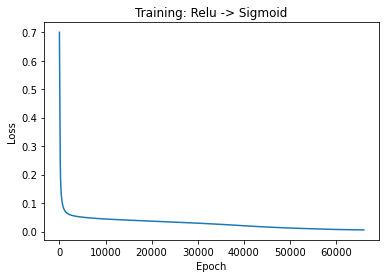

In [3]:
'''
Training the Neural Network, you do not need to modify this cell
We are going to use Breast Cancer Wisconsin (Diagnostic) Data Set provided by sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
'''
dataset = load_breast_cancer() # load the dataset
x, y = dataset.data, dataset.target
x = MinMaxScaler().fit_transform(x) #normalize data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.1) # initalize neural net class
nn.gradient_descent(x_train, y_train, iter = 66000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")


Classification Report for Relu -> Sigmoid


              precision    recall  f1-score   support

   malignant       0.96      0.95      0.95        55
      benign       0.97      0.98      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



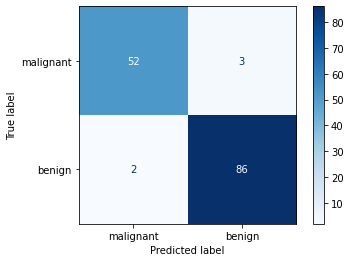

In [4]:
'''
Testing Neural Network
'''
y_predicted = nn.predict(x_test) # predict 

#plot
print(f"Classification Report for {nn.neural_net_type}\n\n")
print(classification_report(y_test, y_predicted, target_names=dataset.target_names))
plot_confusion_matrix(nn, x_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()  


Loss after iteration 2000: 0.001772
Loss after iteration 4000: 0.000119
Loss after iteration 6000: 0.019489
Loss after iteration 8000: 1.313548
Loss after iteration 10000: 0.001398
Loss after iteration 12000: 0.000014
Loss after iteration 14000: 0.000057
Loss after iteration 16000: 0.000012
Loss after iteration 18000: 0.000004
Loss after iteration 20000: 0.067969
Loss after iteration 22000: 0.000238
Loss after iteration 24000: 0.001232
Loss after iteration 26000: 0.014399
Loss after iteration 28000: 0.000140
Loss after iteration 30000: 0.000063
Loss after iteration 32000: 0.001527
Loss after iteration 34000: 0.000117
Loss after iteration 36000: 0.000391
Loss after iteration 38000: 0.000000
Loss after iteration 40000: 0.000003
Loss after iteration 42000: 0.000369
Loss after iteration 44000: 0.001250
Loss after iteration 46000: 0.000075
Loss after iteration 48000: 0.000000
Loss after iteration 50000: 0.000817
Loss after iteration 52000: 0.000221
Loss after iteration 54000: 0.000017
Loss 

Text(0, 0.5, 'Loss')

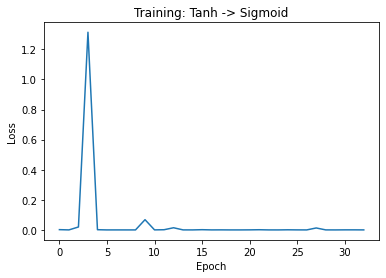

In [6]:
'''
Training the Neural Network, you do not need to modify this cell
We are going to use Breast Cancer Wisconsin (Diagnostic) Data Set provided by sklearn
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
'''
dataset = load_breast_cancer() # load the dataset
x, y = dataset.data, dataset.target
x = MinMaxScaler().fit_transform(x) #normalize data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #split data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.reshape(1,-1), y_test #condition data

nn = dlnet(x_train,y_train,lr=0.1) # initalize neural net class
nn.stochastic_gradient_descent(x_train, y_train, iter = 66000) #train

# create figure
fig = plt.plot(np.array(nn.loss).squeeze())
plt.title(f'Training: {nn.neural_net_type}')
plt.xlabel("Epoch")
plt.ylabel("Loss")



Classification Report for Tanh -> Sigmoid


              precision    recall  f1-score   support

   malignant       0.95      0.96      0.95        55
      benign       0.98      0.97      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



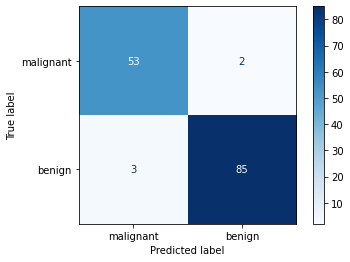

In [7]:
'''
Testing Neural Network
'''
y_predicted = nn.predict(x_test) # predict 

#plot
print(f"Classification Report for {nn.neural_net_type}\n\n")
print(classification_report(y_test, y_predicted, target_names=dataset.target_names))
plot_confusion_matrix(nn, x_test, y_test, cmap=plt.cm.Blues, display_labels=dataset.target_names)  
plt.show()

## 2:  (Bounus for all) Image Classification based on Convolutional Neural Networks [15pts] <span style="color:green">**[W]**</span>


Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research. In this part, you will build a convolutional neural network based on Keras to solve the image classification task for MINIST. If you haven't installed TensorFlow, you can install the package by **pip** command or train your model by uploading HW4 notebook to [Colab](https://colab.research.google.com/) directly. Colab contains all packages you need for this section.  

Hint1: [First contact with Keras](https://keras.io/about/)

Hint2: [How to Install Keras](https://www.pyimagesearch.com/2016/07/18/installing-keras-for-deep-learning/)

Hint3：[CS231n Tutorial (Layers used to build ConvNets) ](https://cs231n.github.io/convolutional-networks/)

### Environment Setup

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

### Load MINIST dataset

We use [MINIST](http://yann.lecun.com/exdb/mnist/) dataset to train our model. MINIST is a subset of a larger set available from NIST. MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. Each example is $28\times 28$ pixel grayscale image of handwritten digits between 0 to 9. 

In [9]:
# Helper function, You don't need to modify it
# split data between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# input image dimensions
img_rows, img_cols = 28, 28
#set num of classes
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


### Load some images from MINIST##

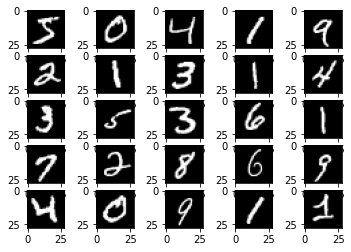

In [10]:
# Helper function, You don't need to modify it
# Show some images from MINIST
for i in range(0,25):
    plt.subplot(5,5,i+1)
    image=x_train[i].reshape((28,28))
    plt.imshow(image,cmap='gray')
plt.show()

As you can see from above, the MINIST dataset contains handwritten digits from 0 to 9. The digits have been size-normalized and centered in fixed-size images.

### Build convolutional neural network model

In this part, you need to build a convolutional neural network that contains 2 convolutional layers. The architecture of thie model is:

 **[INPUT - CONV - RELU - MAXPOOL - CONV - RELU - MAXPOOL - FC1 - FC2]** [1]


> INPUT: [$28\times28\times1$] will hold the raw pixel values of the image, in this case, an image of width 28, height 28, and with only one color channels.


> CONV: Conv. layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to the input volume. We decide to set the kernel_size $3\times3$ for the both Conv. layers. For example, the output of the Conv. layer may like $[26\times26\times32]$ if we use 32 filters. 


> RELU: As we mentioned in the previous section, the Relu layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero, which leaves the size of the volume unchanged.

> MAXPOOL: MAXPOOL layer will perform a downsampling operation along the spatial dimensions (width, hight). 

> FC1: First Fully-Connected layer, we use **ReLu** as the activation function. The dimension of the output space is 128.

> FC2: Second Fully-Connected layer will compute the class scores. We use **Softmax** as the activation function. The dimension of the output space is the number of class. 

**Loss function**: Crossentropy (mentioned in the previous section) 

**optimizer**: Stochastic gradient descent(SGD)



[1] CS231n: https://cs231n.github.io/convolutional-networks/


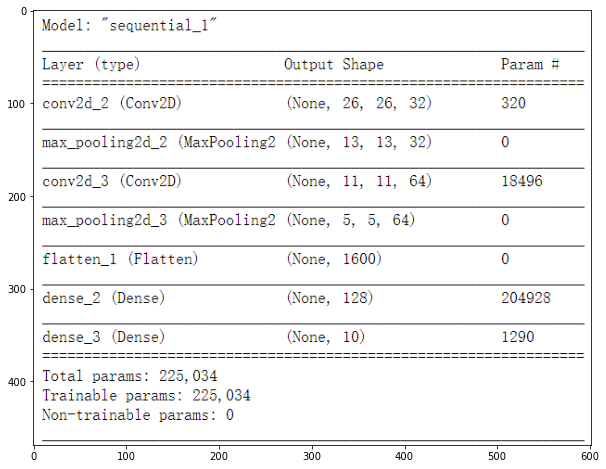

In [11]:
# Helper function, You don't need to modify it
# Show the architecture of the model
achi=plt.imread('Architecture.png')
fig = plt.figure(figsize=(10,10))
plt.imshow(achi)

#### Defining Variables ####

In [12]:
# Defining Variables
# Do not change the value of num_classes. 
# You can adjust of adding parameters to train your model
batch_size = 128
epochs = 12
lr = 1e-3 #learning rate

#### Defining model ####

In [13]:
def create_net():
    '''
    In this function you are going to build a convolutional neural network based on Keras.
    First, use Sequential() to set the inference features on this model. 
    Then, use model.add() and model.compile() to build your own model
    Return: model you build
    '''
    # Initialize model
    model = Sequential()
    
    # Add first convolution layer with activation function Relu()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Add first max pooling layer with pool size 2X2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Add second convolution layer wiht activation function Relu()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(13, 13, 1)))
    # Add second max pooling layer with pool size 2X2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten output
    model.add(Flatten())
    # Add first fully connected layer with 128 nodes
    model.add(Dense(128, activation='relu'))
    # Add second fully connected layer with 10 nodes
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    SDG = keras.optimizers.SGD(learning_rate=lr)
    model.compile(optimizer = SDG, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Return model
    return model

In [14]:
# Helper function, You don't need to modify it
# model.summary() gives you details of your architecture.
#You can compare your architecture with the 'Architecture.png'
model=create_net()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Train the network

**Tuning:** Training the network is the next thing to try.  You can set your parameter at the **Defining Variable** section. If your parameters are set properly, you should see the loss of the validation set decreased and the value of accuracy increased. It may take more than 20 minutes to train your model. 

**Expected Result:** You should be able to achieve more than $90\%$ accuracy on the test set to get full 15 points. If you achieve accuracy between $80\%$ to $90\%$, you will only get half points of this part. 

#### Train your own CNN model####

In [15]:
# Helper function, You don't need to modify it
# Train the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 22s 47ms/step - loss: 2.2675 - accuracy: 0.2042 - val_loss: 2.2288 - val_accuracy: 0.3426
Epoch 2/12
469/469 [==============================] - 24s 52ms/step - loss: 2.1802 - accuracy: 0.4223 - val_loss: 2.1119 - val_accuracy: 0.5203
Epoch 3/12
469/469 [==============================] - 24s 51ms/step - loss: 2.0015 - accuracy: 0.5741 - val_loss: 1.8383 - val_accuracy: 0.6448
Epoch 4/12
469/469 [==============================] - 24s 52ms/step - loss: 1.5881 - accuracy: 0.6820 - val_loss: 1.2699 - val_accuracy: 0.7499
Epoch 5/12
469/469 [==============================] - 23s 49ms/step - loss: 1.0229 - accuracy: 0.7785 - val_loss: 0.7809 - val_accuracy: 0.8264
Epoch 6/12
469/469 [==============================] - 23s 48ms/step - loss: 0.6834 - accuracy: 0.8340 - val_loss: 0.5647 - val_accuracy: 0.8595
Epoch 7/12
469/469 [==============================] - 26s 55ms/step - loss: 0.5343 - accuracy: 0.8609 - val_loss: 0.4678 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


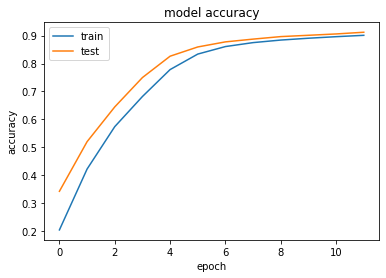

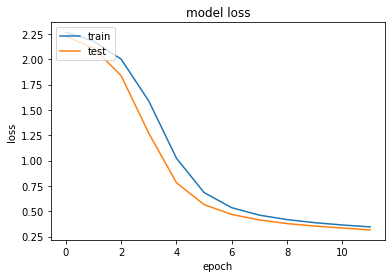

In [16]:
# Helper function, You don't need to modify it
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summary

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## 3: Random Forests [40pts] <span style="color:blue">**[P]**</span> <span style="color:green">**[W]**</span>

**NOTE**: Please use sklearn's DecisionTreeClassifier in your Random Forest implementation.
[You can find more details about this classifier here.](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier_)

### 3.1 Random Forest Implementation (30 pts) <span style="color:blue">**[P]**</span>

The decision boundaries drawn by decision trees are very sharp, and fitting a decision tree of unbounded depth to a list of examples almost inevitably leads to **overfitting**. In an attempt to decrease the variance of a decision tree, we're going to use a technique called 'Bootstrap Aggregating' (often abbreviated 'bagging'). This stems from the idea that a collection of weak learners can learn decision boundaries as well as a strong learner. This is commonly called a Random Forest.

We can build a Random Forest as a collection of decision trees, as follows:

1) For every tree in the random forest, we're going to 

    a) Subsample the examples with replacement. Note that in this question, the size of the subsample data is equal to the original dataset. 
    
    b) From the subsamples in a), choose attributes at random to learn on in accordance with a provided attribute subsampling rate. Based on what it was mentioned in the class, we randomly pick features in each split. We use a more general approach here to make the programming part easier. Let's randomly pick some features (70% percent of features) and grow the tree based on the pre-determined randomly selected features. Therefore, there is no need to find random features in each split.
    
    c) Fit a decision tree to the subsample of data we've chosen to a certain depth.
    
Classification for a random forest is then done by taking a majority vote of the classifications yielded by each tree in the forest after it classifies an example.

In RandomForest Class, 
1. X is assumed to be a matrix with num_training rows and num_features columns where num_training is the
number of total records and num_features is the number of features of each record. 

2. y is assumed to be a vector of labels of length num_training.

**NOTE:** Lookout for TODOs for the parts that needs to be implemented.

In [17]:
import numpy as np
import math
import sklearn
import time
import pdb

class RandomForest(object):
    def __init__(self, n_estimators=50, max_depth=None, max_features=0.7):
        # helper function. You don't have to modify it
        # Initialization done here
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstraps_row_indices = []
        self.feature_indices = []
        self.out_of_bag = []
        self.decision_trees = [sklearn.tree.DecisionTreeClassifier(max_depth=max_depth, criterion='entropy') for i in range(n_estimators)]
        
    def _bootstrapping(self, num_training, num_features, random_seed = None):
        """
        TODO: 
        - Randomly select indices of size num_training with replacement corresponding to row locations of 
          selected samples in the original dataset.
        - Randomly select indices without replacement corresponding the column locations of selected features in the original feature
           list (num_features denotes the total number of features in the training set, max_features denotes the percentage 
           of features that are used to fit each decision tree).
        
        Reference: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)
        
        Args: 
        - num_training: an integer N representing the total number of training instances.
        - num_features: an integer D representing the total number of features.
            
        Returns:
        - row_idx: (N,) numpy array of row indices corresponding to the row locations of the selected samples in the original dataset.
        - col_idx: 1-D array of column indices corresponding to the column locations of selected features in the original feature list. 
                    
        Hint: Consider using np.random.choice.
        """
        np.random.seed(seed=random_seed)
        row_idx = np.random.choice(num_training, num_training, replace=True)
        col_idx = list(np.random.choice(num_features, math.floor(num_features * self.max_features), replace=False))
        return row_idx, col_idx
            
    def bootstrapping(self, num_training, num_features):
        """
        Args: 
        - num_training: an integer N representing the total number of training instances.
        - num_features: an integer D representing the total number of features.
        
        Returns:
        - None
        """
        # helper function. You don't have to modify it
        # Initializing the bootstap datasets for each tree
        for i in range(self.n_estimators):
            total = set(list(range(num_training)))
            row_idx, col_idx = self._bootstrapping(num_training, num_features)
            total = total - set(row_idx)
            self.bootstraps_row_indices.append(row_idx)
            self.feature_indices.append(col_idx)
            self.out_of_bag.append(total)

    def fit(self, X, y):
        """
        TODO:
        Train decision trees using the bootstrapped datasets.
        Note that you need to use the row indices and column indices.
        
        Args:
        -X: NxD numpy array, where N is number 
           of instances and D is the dimensionality of each 
           instance
        -y: Nx1 numpy array, the predicted labels
        
        Returns:
        - None
        """
        self.bootstrapping(X.shape[0], X.shape[1])
        i = 0
        for decision_tree in self.decision_trees:
            xs = np.take(np.take(X, self.bootstraps_row_indices[i], axis=0), self.feature_indices[i], axis=1)
            ys = np.take(y, self.bootstraps_row_indices[i], axis=0)
            decision_tree.fit(xs, ys)
            i += 1
        
        
    
    def OOB_score(self, X, y):
        # helper function. You don't have to modify it
        # This function computes the accuracy of the random forest model predicting y given x.
        accuracy = []
        for i in range(len(X)):
            predictions = []
            for t in range(self.n_estimators):
                if i in self.out_of_bag[t]:
                    predictions.append(self.decision_trees[t].predict(np.reshape(X[i][self.feature_indices[t]], (1,-1)))[0])
            if len(predictions) > 0:
                accuracy.append(np.sum(predictions == y[i]) / float(len(predictions)))
        return np.mean(accuracy)

### 3.2 Hyperparameter Tuning with a Random Forest (5pts) <span style="color:blue">**[P]**</span>

In machine learning, hyperparameters are parameters that are set before the learning process begins. The max_depth, num_estimators, or max_features variables from 3.1 are examples of different hyperparameters for a random forest model. In this section, you will tune your random forest model on an e-commerce dataset to achieve a high accuracy on a classifying revenue sessions (whether a customer will purchase a product) from user behavior.

Let's first review the dataset in a bit more detail.

#### Dataset Objective

Imagine that we are the founders of a new e-commerce company that uses machine learning to optimize the user experience. We are tasked with the responsibility of coming up with a method for determining the likelihood of a shopping session ending in a purchase being made. We will then use this information to adjust pricing and services to encourage more purchasing.

After much deliberation amongst the team, you come to a conclusion that we can use past online shopping data to predict the future occurence of revenue sessions. 

We will use our random forest algorithm from Q3.1 to predict if a shopping session ends in a purchase.

You can find more information on the dataset [here](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#).

#### Loading the dataset


The dataset that the company has collected has the following features:

1. Administrative : continuous variable
2. Administrative_Duration	: continuous variable
3. Informational : continuous variable
4. Informational_Duration : continuous variable
5. ProductRelated : continuous variable
6. ProductRelated_Duration : continuous variable
7. BounceRates : continuous variable
8. ExitRates : continuous variable
9. PageValues : continuous variable
10. SpecialDay : continuous variable
11. Month	: categorical variable
12. OperatingSystems	: continuous variable
13. Browser : continuous variable
14. Region : continuous variable
14. TrafficType : continuous variable
14. VisitorType : categorical variable
14. Weekend : continuous variable
14. Revenue : target variable -------------> **Your random forest model will try to predict this variable. A "True" value in this column means a shopper purchased an item given their user behavior described by features 1-17, while a "False" label indicates that a shopper did not purchase an item.**

In [18]:
# Logic for loading in datasets. DO NOT MODIFY anything in this block.
from sklearn import preprocessing
preprocessor = preprocessing.LabelEncoder()

data_train = pd.read_csv("datasets/hw4_fall2020_data_train.csv")
data_test = pd.read_csv("datasets/hw4_fall2020_data_test.csv")

X_train = data_train.drop(columns = 'Revenue')
y_train = data_train['Revenue']
X_test = np.array(data_test.drop(columns = 'Revenue'))
y_test = np.array(data_test['Revenue'])
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
         
#The following lines of code converts columns holding categorical or boolean variables into integers.
X_train[:,10] = preprocessor.fit_transform(X_train[:,10])
X_test[:,10] = preprocessor.fit_transform(X_test[:,10])
X_train[:,-2] = preprocessor.fit_transform(X_train[:,-2])
X_test[:,-2] = preprocessor.fit_transform(X_test[:,-2])


In the following codeblock, train your random forest model with different values for max_depth, n_estimators, or max_features and evaluate each model on the held-out test set. Try to choose a combination of hyperparameters that maximizes your prediction accuracy on the test set (aim for 92%+). **Once you are satisfied with your chosen parameters, change the default values for max_depth, n_estimators, and max_features in the __init__ function of your RandomForest class in random_forest.py to your chosen values, and then submit this file to Gradescope. You must achieve at least a 92% accuracy against a hidden test set (this will NOT the same as the test set provided here) in Gradescope to receive full credit for this section.**

In [19]:
"""
TODO: 
n_estimators defines how many decision trees are fitted for the random forest.
max_depth defines a stop condition when the tree reaches to a certain depth.
max_features controls the percentage of features that are used to fit each decision tree.

Tune these three parameters to achieve a better accuracy. While you can use the provided test set to 
evaluate your implementation, you will need to obtain 92% on a hidden test set to receive full credit 
for this section.
"""
import sklearn.ensemble
n_estimators = 12 #Hint: Consider values between 5-12.
max_depth = 12 # Hint: Consider values betweeen 3-12
max_features = 0.9 # Hint: Consider values betweeen 0.7-1.0.

random_forest = RandomForest(n_estimators, max_depth, max_features)

random_forest.fit(X_train, y_train)
    
accuracy=random_forest.OOB_score(X_test, y_test)
    
print("accuracy: %.4f" % accuracy)

accuracy: 0.9301


### 3.3 Plotting Feature Importance (5pts) <span style="color:green">**[W]**</span>

While building tree-based models, it's common to quantify how well splitting on a particular feature in a decision tree helps with predicting the target label in a dataset. Machine learning practicioners typically use "Gini importance", or the (normalized) total reduction in entropy brought by that feature to evaluate how important that feature is for predicting the target variable. 

Gini importance is typically calculated as the reduction in entropy from reaching a split in a decision tree weighted by the probability of reaching that split in the decision tree. Sklearn internally computes the probability for reaching a split by finding the total number of samples that reaches it during the training phase divided by the total number of samples in the dataset. This weighted value is our feature importance.

Let's think about what this metric means with an example. A high probabiity of reaching a split on "TrafficType" in a decision tree trained on our e-commerce dataset (many samples will reach this split for a decision) and a large reduction in entropy from splitting on "TrafficType" will result in a high feature importance value for "TrafficType". This could mean "TrafficType" is a very important feature for predicting a customer's revenue session. On the other hand, a low probability of reaching a split on "Month" in a decision tree (few samples will reach this split for a decision) and a low reduction in entropy from splitting on "Month" will result in a low feature importance value. This could mean "Month" is not a very informative feature for predicting the revenue session in our decision tree. **Thus, the higher the feature importance value, the more important the feature is to predicting the target label.**

Fortunately for us, fitting a sklearn.DecisionTreeClassifier to a dataset auomatically computes the Gini importance for every feature in the decision tree and stores these values in a **feature_importances_** variable. [Review the docs for more details on how to access this variable](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In the function below, display a bar plot that shows the feature importance values for at least one decision tree in your tuned random forest from Q3.2, and briefly comment on whether any features have noticeably higher / or lower importance weights than others. [Note that there isn't a "correct" answer here. We simply want you to investigate how different features in your random forest contribute to predicting the target variable].


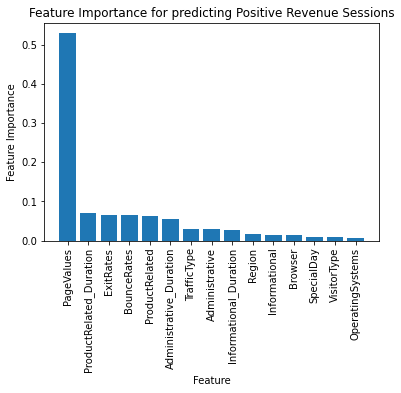

In [20]:
from matplotlib import pyplot as plt

def plot_feature_importance(random_forest):
    """
    TODO:
    -Display a bar plot showing the feature importance of every feature in 
     at least one decision tree from the tuned random_forest from Q3.2.
     
    Args:
        random_forest: This is your implemented and tuned random forest from Q3.2. 
    Returns:
        None. Calling this function should simply display the aforementioned feature importance bar chart
    """
    i = 8
    sort_idx = np.argsort(random_forest.decision_trees[i].feature_importances_)[::-1]
    importance = random_forest.decision_trees[i].feature_importances_[sort_idx]
    idx = random_forest.feature_indices[i]
    features = data_train.columns.drop('Revenue')[idx]
    features = features[sort_idx]
    plt.xticks(rotation='vertical')
    plt.title('Feature Importance for predicting Positive Revenue Sessions')
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.bar(features, importance)

plot_feature_importance(random_forest)

## 4: SVM (30 Pts) <span style="color:green">**[W]**</span>


### 4.1 Fitting an SVM classifier by hand (20 Pts) <span style="color:green">**[W]**</span>

Consider a dataset with 2 points in 1-dimensional space: $(x_1 = -3, y_1 = −1)$ and $(x_2 = 2, y_2 = 1)$. Here $x$ are the point coordinates and $y$ are the classes.

Consider mapping each point to 3-dimensional space using the feature vector $\phi(x) = [1,2x, x^2]$. (This is equivalent to using a second order polynomial kernel.) The max margin classifier has the form

$$min ||\mathbf{\theta}||^2 s.t.$$

$$y_1(\phi(x_1)\mathbf{\theta} + b) ≥ 1 $$

$$y_2(\phi(x_2)\mathbf{\theta}+ b) ≥ 1 $$

**Hint:** $\phi(x_1)$ and $\phi(x_2)$ are the suppport vectors. We have already given you the solution for the suppport vectors and you need to calculate back the parameters. Margin is equal to $\frac{1}{||\mathbf{\theta}||}$ and full margin is equal to $\frac{2}{||\mathbf{\theta}||}$.

(1) Find a vector parallel to the optimal vector $\mathbf{\theta}$. (4pts)

\begin{equation}
Z_{1} = \phi(x_1) = [1, 2x_1, x_{1}^{2}] = [1, -6, 9]
   \quad\mathrm{and}\quad 
Z_{2} = \phi(x_1) = [1, 2x_2, x_{2}^{2}] = [1, 4, 4]
\end{equation}

\begin{equation}
v = Z_2 - Z_1
   \quad\mathrm{=>}\quad 
v = [1, 4, 4] - [1, -6, 9]
    \quad\mathrm{=>}\quad
v = [0, 10, -5]
\end{equation}

\begin{equation}
\hat{v} = \frac{v}{\lVert v \rVert}
    \quad\mathrm{=>}\quad
\hat{v} = \frac{[0, 10, -5]}{\sqrt{(10)^2 + (-5)^2}}
    \quad\mathrm{=>}\quad
\boxed{\hat{v} = [0, \frac{2\sqrt{5}}{5}, -\frac{\sqrt{5}}{5}]}
\end{equation}

(2) Calculate the value of the margin achieved by this $\mathbf{\theta}$? (4pts)

\begin{equation}
margin = \frac{\lVert v \rVert}{2}
   \quad\mathrm{=>}\quad 
\boxed{margin = \frac{5\sqrt{5}}{2}}
\end{equation}

(3) Solve for $\mathbf{\theta}$, given that the margin is equal to $1/||\mathbf{\theta}||$. (4pts)

Because $\theta$ and $\hat{v}$ are parallel, we know that $\theta = k*\hat{v}$. Lets solve for $\theta$

\begin{equation}
margin = \frac{1}{\lVert \theta \rVert}
   \quad\mathrm{=>}\quad 
\lVert \theta \rVert = \frac{1}{margin}
    \quad\mathrm{=>}\quad
\lVert \theta \rVert = \frac{2\sqrt{5}}{25}
\end{equation}

\begin{equation}
\theta = k*\hat{v}
   \quad\mathrm{=>}\quad 
\theta = [0, \frac{2\sqrt{5}}{5}k, \frac{-\sqrt{5}}{5}k]
\end{equation}

\begin{equation}
\lVert \theta \rVert = \sqrt{(\frac{2\sqrt{5}}{5}k)^2 + (\frac{-\sqrt{5}}{5}k)^2} = \frac{2\sqrt{5}}{25}
   \quad\mathrm{=>}\quad 
(\frac{2\sqrt{5}}{5}k)^2 + (\frac{-\sqrt{5}}{5}k)^2 = \frac{4}{125}
    \quad\mathrm{=>}\quad
k^2(\frac{4}{5} + \frac{1}{5}) = \frac{4}{125}
    \quad\mathrm{=>}\quad
\sqrt{k^2} = \sqrt{\frac{4}{125}}
    \quad\mathrm{=>}\quad
k = \pm \frac{2\sqrt{5}}{25}
\end{equation}


\begin{equation}
\boxed{
\theta = [0, 0.16, -0.08]
   \quad\mathrm{or}\quad 
\theta = [0, -0.16, 0.08]
}
\end{equation}

(4) Solve for $b$ using your value for $\mathbf{\theta}$. (4pts)

To find b, we must plug in our two options for $\theta$ into the two constraint inequalities. The correct one will yield a result where $b \leq b'$ and $b \geq b'$

Lets try $\theta = [0, 0.16, -0.08]$ first:

\begin{equation}
y_1(Z_1 \theta + b) \geq 1
   \quad\mathrm{=>}\quad 
-1((0 - 6(0.16) - 9(0.08)) + b) \geq 1
    \quad\mathrm{=>}\quad
(-0.96 - 0.72) + b \leq -1
    \quad\mathrm{=>}\quad
-1.68 + b \leq -1
    \quad\mathrm{=>}\quad
b \leq 0.68
\end{equation}

\begin{equation}
y_2(Z_2 \theta + b) \geq 1
   \quad\mathrm{=>}\quad 
1((0 + 4(0.16) - 4(0.08)) + b) \geq 1
    \quad\mathrm{=>}\quad
(0.64 - 0.32) + b \geq 1
    \quad\mathrm{=>}\quad
0.32 + b \geq 1
    \quad\mathrm{=>}\quad
b \geq 0.68
\end{equation}

We can conclude that: $\boxed{b = 0.68}$ and that the correct $\theta$ in question 3 is: $\boxed{\theta = [0, 0.16, -0.08]}$


(5) Write down the form of the discriminant function $f(x) = \phi(x)\mathbf{\theta}+b$ as an explicit function of $x$.

\begin{equation}
f(x) = \phi(x)\theta + b
   \quad\mathrm{=>}\quad 
\boxed{f(x) = -0.08x^2 + 0.32x + 0.68}
\end{equation}

### 4.2 Feature Mapping (10 Pts) <span style="color:green">**[W]**</span>

Let's look at a dataset where the datapoint can't be classified with a good accuracy using a linear classifier. Run the below cell to generate the dataset.

We will also see what happens when we try to fit a linear classifier to the dataset.

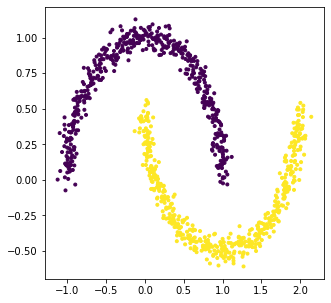

In [21]:
# DO NOT CHANGE
# Generate dataset

random_state = 1

X, y = make_moons(n_samples=1000, noise=.05)

y = np.where(y == 0, -1, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c = y, marker = '.') 
plt.show() 

In [22]:
def visualize_decision_boundary(X, y, feature_new=None, h=0.02):
    '''
    You don't have to modify this function
    
    Function to vizualize decision boundary
    
    feature_new is a function to get X with additional features
    '''
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx_1, xx_2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    if X.shape[1] == 2:
        Z = svm_cls.predict(np.c_[xx_1.ravel(), xx_2.ravel()])
    else:
        X_conc = np.c_[xx_1.ravel(), xx_2.ravel()]
        X_new = feature_new(X_conc)
        Z = svm_cls.predict(X_new)

    Z = Z.reshape(xx_1.shape)
    
    f, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
    plt.contourf(xx_1, xx_2, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.xlim(xx_1.min(), xx_1.max())
    plt.ylim(xx_2.min(), xx_2.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

Accuracy on test dataset: 0.875


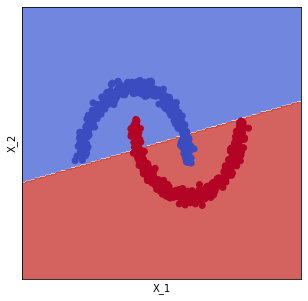

In [23]:
# DO NOT CHANGE
# Try to fit a linear classifier to the dataset

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, 
                                                           y_test_predicted)))

visualize_decision_boundary(X_train, y_train)

We can see that we need a non-linear boundary to be able to successfully classify data in this dataset. By mapping the current feature x to a higher space with more features, linear SVM could be performed on the features in the higher space to learn a non-linear decision boundary. In the function below add additional features which can help classify in the above dataset. After creating the additional features use code in the further cells to see how well the features perform on the test set.  
(**Hint:** Think of the shape of the decision boundary that would best separate the above points. What additional features could help map the linear boundary to the non-linear one? Look at [this](https://xavierbourretsicotte.github.io/Kernel_feature_map.html) for a detailed analysis of doing the same for points separable with a circular boundary)

In [ ]:
def create_nl_feature(X):
    '''
    TODO - Create additional features and add it to the dataset
    
    returns:
        X_new - (N, d + num_new_features) array with 
                additional features added to X such that it
                can classify the points in the dataset.
    '''
    #  Delete this line when you implement the function
    raise NotImplementedError
    

In [ ]:
# DO NOT CHANGE
# Create new features

X_new = create_nl_feature(X)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, 
                                                    test_size=0.20, 
                                                    random_state=random_state)

In [ ]:
# DO NOT CHANGE
# Fit to the new features and vizualize the decision boundary
# You should get more than 90% accuracy on test set

svm_cls = svm.LinearSVC()
svm_cls.fit(X_train, y_train)
y_test_predicted = svm_cls.predict(X_test)

print("Accuracy on test dataset: {}".format(accuracy_score(y_test, y_test_predicted)))

visualize_decision_boundary(X_train, y_train, create_nl_feature)